In [559]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
import PIL as image
from nltk.corpus import stopwords

import wordcloud,stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle




In [560]:
df =pd.read_csv('cyberbullying_tweets(ML).csv')

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [562]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [563]:
df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [564]:
df.tail()

,tweet_text,cyberbullying_type
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity


In [565]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [566]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [567]:
df=df.rename(columns={
    'tweet_text':'text','cyberbullying_type':'sentiment'
})
df.head()

,text,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [568]:
df['sentiment_encoded']=df['sentiment'].replace({
    'religion':1,
    'age':2,
    'ethnicity':3,
    'gender':4,
    'other_cyberbullying':5,
    'not_cyberbullying':6
})
df.tail()

,text,sentiment,sentiment_encoded
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,3
47688,Turner did not withhold his disappointment. Tu...,ethnicity,3
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,3
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,3
47691,Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...,ethnicity,3


In [569]:
from wordcloud import WordCloud, STOPWORDS

In [570]:
from nltk.corpus import stopwords


import nltk
nltk.download('stopwords')


stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [571]:
###preprocessing of text

In [572]:
#function to remove emojis
def strip_emoji(text):
    return emoji.replace_emoji(text,replace="")

In [573]:
def strip_all_entities(text):
    text=text.replace('\r','').replace('\n','').lower()
    text=re.sub(r"(?:\@|https?|-\://)S+",'',text)
    text=re.sub(r"[x100-\x7f]",r'',text)
    text=re.sub('[0-9]+','',text)

    stopchars=string.punctuation
    table=str.maketrans('','',stopchars)
    text=text.translate(table)

    text=[word for word in text.split() if word not in stop_words]
    text=''.join(text)

    return text

In [574]:
#functions to remove contractions

In [575]:
def decontract(text):

    text=re.sub(r"cant\'t'","cant not",text)
    text=re.sub(r"n\'t","not",text)
    text=re.sub(r"\'re","are",text)
    text=re.sub(r"\'s","is",text)
    text=re.sub(r"\'d","would",text)
    text=re.sub(r"\'ll","will",text)
    text=re.sub(r"\'t"," not",text)
    text=re.sub(r"\'ve","have",text)
    text=re.sub(r"\'m","am",text)

    return text
    

In [576]:
def clean_hashtags(tweet):

    new_tweet="".join(word.strip() for word in re.split('#(?!(?:hasttag)\b)[\W-]+(?!(:\s+#[\w-]+)*\s*$)',tweet))
    new_tweet2="".join(word.strip() for word in re.split('#|',new_tweet))

    return new_tweet2

In [577]:
def filter_chars(a):
    sent=[]
    for word in a.split(' '):
        if('$' in word)|('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return''.join(sent)

In [578]:
def remove_mult_spaces(text):
    return re.sub("\s\s+"," ",text)
    
def stemmer(text):
    tokenized=nltk.word_tokenize(text)
    ps = PorterStemmer()
    return''.join([ps.stem(word)for word in tokenized])

def lemmatize(text):
    tokenized=nltk.word_tokenize(text)
    lm=WordNetLemmatizer()
    return ''.join([lm.lemmatize(word) for word in tokenized])
    


In [579]:
def preprocess(text):
    text=strip_emoji(text)
    text=decontract(text)
    text=strip_all_entities(text)
    text=clean_hashtags(text)
    text=filter_chars(text)
    text=stemmer(text)
    text=lemmatize(text)
    text=remove_mult_spaces(text)
    return text

In [580]:
df['cleaned_text']=df['text'].apply(preprocess)
df.head()

,text,sentiment,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,6,
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,6,
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,6,
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,6,


In [581]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [582]:
df['cleaned_text'].duplicated().sum()

np.int64(46774)

In [583]:
df.drop_duplicates('cleaned_text',inplace=True)

In [584]:
df['cleaned_text']=df['text'].apply(preprocess)
df.head()

,text,sentiment,sentiment_encoded,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,
13,RT @Kurdsnews: Turkish state has killed 241 ch...,not_cyberbullying,6,çğüç…
21,Kids Love😘❤ @ Mohamad Bin Zayed City مدينة محم...,not_cyberbullying,6,مدينةمحمدبنزايد
26,@sand_dejesus Isso é bullying! @O_Patriarca,not_cyberbullying,6,é
48,"@janaane poise, odiei aquilo ele sofria bullyi...",not_cyberbullying,6,ç


In [585]:
df['tweet_list']=df['cleaned_text'].apply(word_tokenize)
df.head(10)

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list
0,"In other words #katandandre, your food was cra...",not_cyberbullying,6,,[]
13,RT @Kurdsnews: Turkish state has killed 241 ch...,not_cyberbullying,6,çğüç…,[çğüç…]
21,Kids Love😘❤ @ Mohamad Bin Zayed City مدينة محم...,not_cyberbullying,6,مدينةمحمدبنزايد,[مدينةمحمدبنزايد]
26,@sand_dejesus Isso é bullying! @O_Patriarca,not_cyberbullying,6,é,[é]
48,"@janaane poise, odiei aquilo ele sofria bullyi...",not_cyberbullying,6,ç,[ç]
67,RT @Hanar_Marouf: Daesh is distrbuting Stolen ...,not_cyberbullying,6,…,[…]
77,aposto que vou sofrer bullying depois do meu p...,not_cyberbullying,6,ó,[ó]
84,› Meninos do Tumblr são assim: › › Meninas do ...,not_cyberbullying,6,›ã››ã››››é,[›ã››ã››››é]
92,COLÉGIOS ADVENTISTAS DE SÃO PAULO DISCUTEM O B...,not_cyberbullying,6,éãã,[éãã]
131,"Minnesota gay teens bullied by adults, peers, ...",not_cyberbullying,6,–,[–]


In [586]:
text_len=[]
for text in df.tweet_list:
    tweet_len=len(text)
    text_len.append(tweet_len)
df['text_len']=text_len

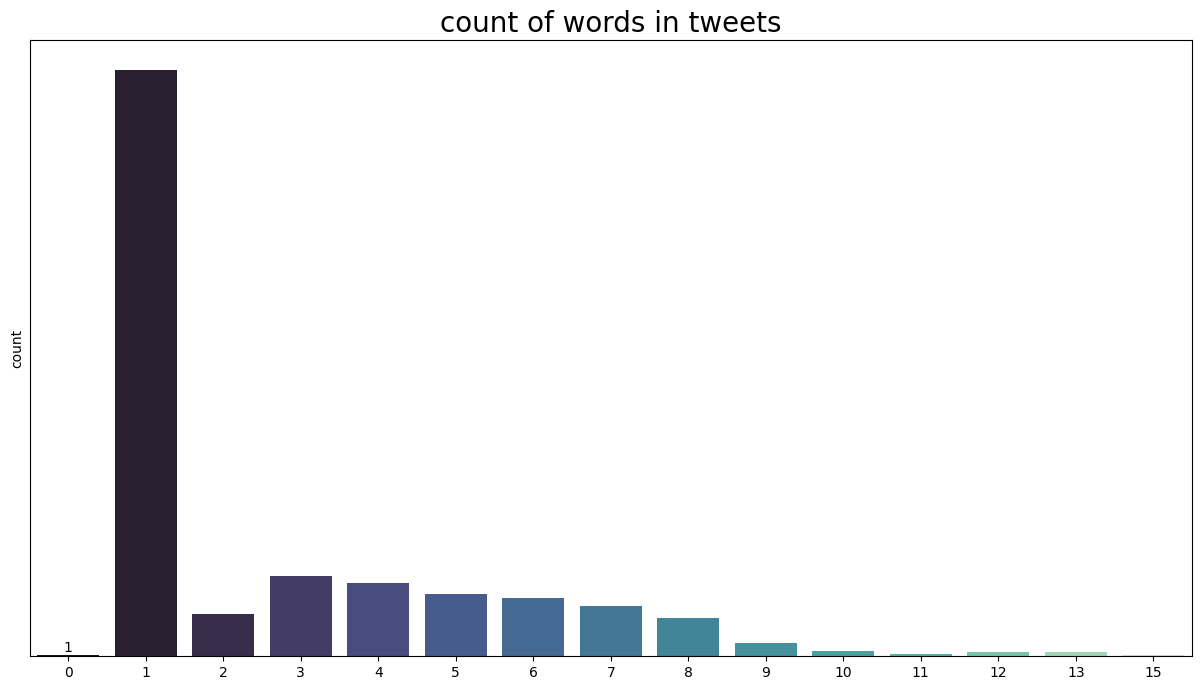

In [587]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='text_len',data=df,palette='mako')
plt.title('count of words in tweets',fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [588]:
df =df[df['text_len']!=0]

In [589]:
df.shape

(917, 6)

In [590]:
def plot_wordcloud(cyberbullying_type):
    string=" "
    for i in df[df.sentiment==cyberbullying_type].cleaned_text.values:
        string = string+" "+i.strip()
        wordcloud=WordCloud(background_color='white',max_words=2000,max_font_size=256,
                  random_state=42).generate(string)

        plt.figure(figsize=(8,8),facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(cyberbullying_type)
        plt.show()
        del string
        

In [591]:
not_cyberbullying_type=df[df['sentiment']=='not_cyberbullying']
gender_type=df[df['sentiment']=='gender']
religion_type= df[df['sentiment']=='religion']
other_cyberbullying_type=df[df['sentiment']=='other_cyberbullying']
age_type=df[df['sentiment']=='other_cyberbullying']
ethnicity_type=df[df['sentiment']=='ethnicity']


In [592]:
gender = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top20_gender =pd.DataFrame(gender.most_common(20))
top20_gender.columns=['Top Words','Count']
top20_gender.head(20)

,Top Words,Count
0,’,346
1,“,182
2,”,169
3,‘,42
4,—,12
5,⁦⁩,4
6,…,3
7,••••,2
8,•••,2
9,«,2


Text(0.5, 1.0, 'Top 20 words in gender cyberbullying')

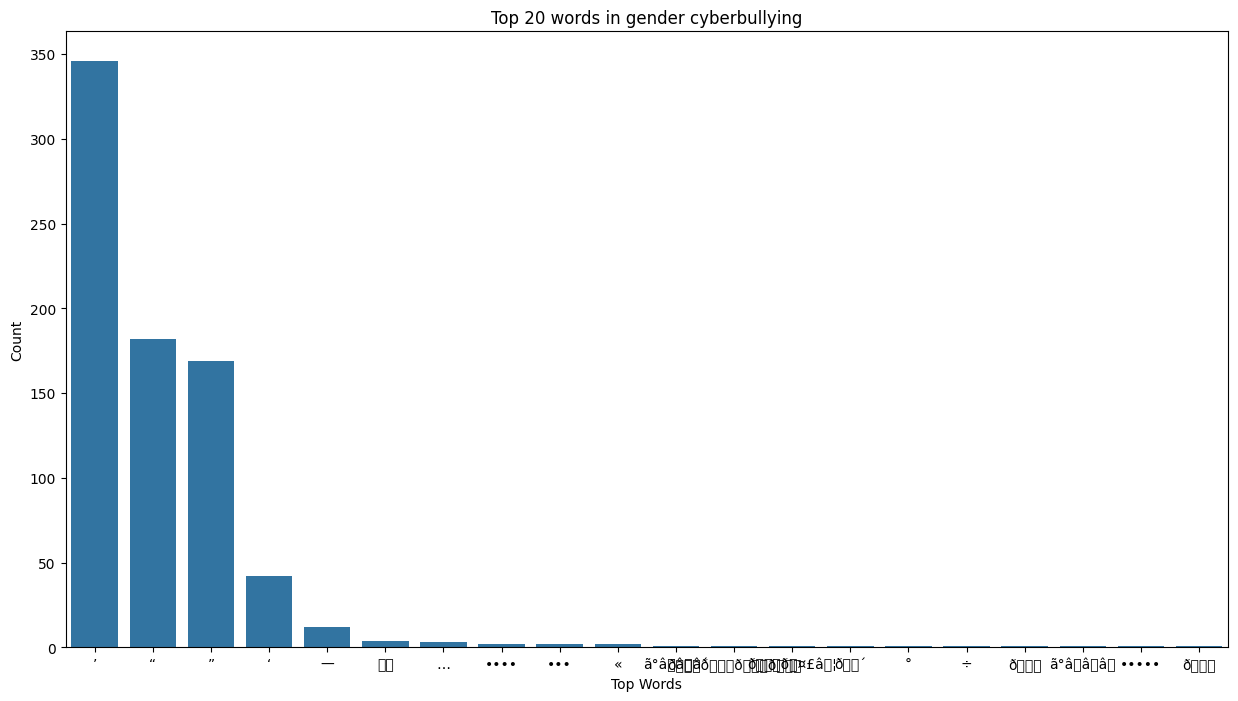

In [593]:
fig=plt.figure(figsize=(15,8))
sns.barplot(data=top20_gender,y="Count",x="Top Words")
plt.title("Top 20 words in gender cyberbullying")

In [594]:
religion = Counter([item for sublist in gender_type['tweet_list'] for item in sublist])
top20_religion  =pd.DataFrame(religion .most_common(20))
top20_religion .columns=['Top Words','Count']
top20_religion.head(20)

,Top Words,Count
0,’,346
1,“,182
2,”,169
3,‘,42
4,—,12
5,⁦⁩,4
6,…,3
7,••••,2
8,•••,2
9,«,2


Text(0.5, 1.0, 'Top 20 words in Religion cyberbullying')

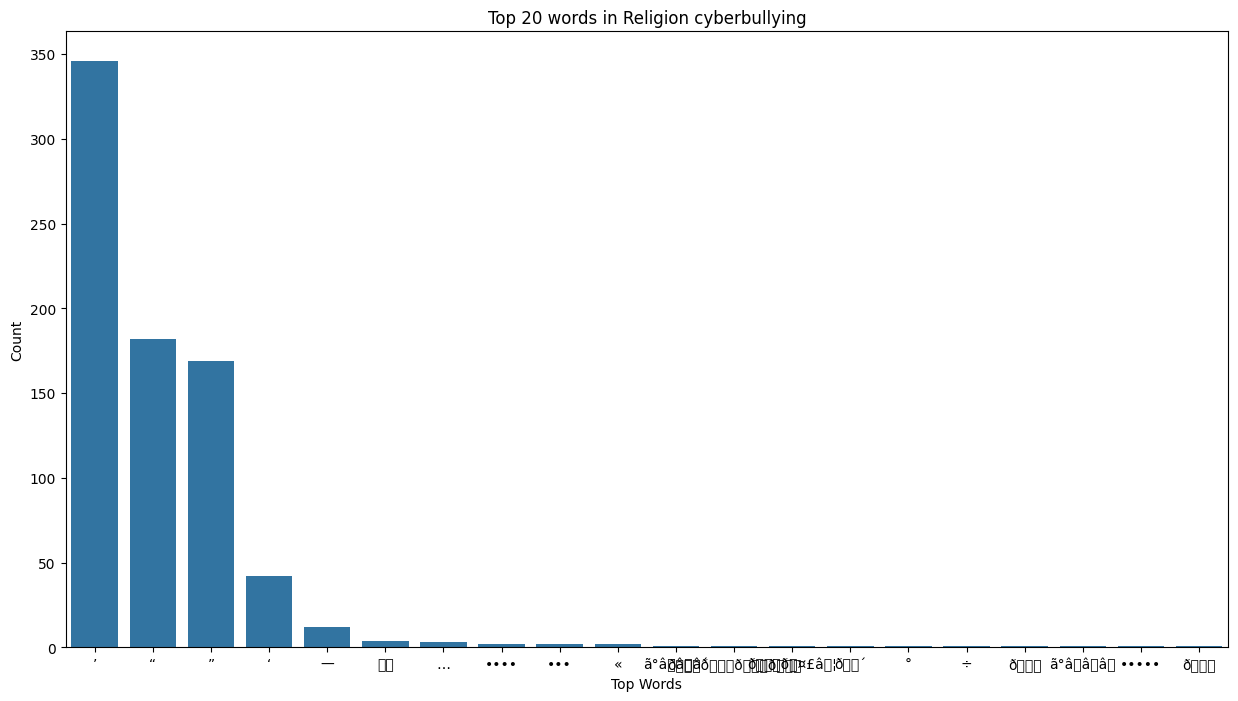

In [595]:
fig=plt.figure(figsize=(15,8))
sns.barplot(data = top20_religion,y="Count",x="Top Words")
plt.title("Top 20 words in Religion cyberbullying")

In [596]:
df.head()

,text,sentiment,sentiment_encoded,cleaned_text,tweet_list,text_len
13,RT @Kurdsnews: Turkish state has killed 241 ch...,not_cyberbullying,6,çğüç…,[çğüç…],1
21,Kids Love😘❤ @ Mohamad Bin Zayed City مدينة محم...,not_cyberbullying,6,مدينةمحمدبنزايد,[مدينةمحمدبنزايد],1
26,@sand_dejesus Isso é bullying! @O_Patriarca,not_cyberbullying,6,é,[é],1
48,"@janaane poise, odiei aquilo ele sofria bullyi...",not_cyberbullying,6,ç,[ç],1
67,RT @Hanar_Marouf: Daesh is distrbuting Stolen ...,not_cyberbullying,6,…,[…],1


In [597]:
sentiments =["religion","age","ethicity","gender","other_cyberbullying","not_cyberbullying"]

In [598]:
X,y = df['cleaned_text'],df['sentiment_encoded']

In [599]:
from sklearn.model_selection import train_test_split

In [600]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,stratify=y,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(641,) (641,) (276,) (276,)


In [601]:
tf_idf=TfidfVectorizer()
X_train_tf=tf_idf.fit_transform(X_train)
X_test_tf=tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_train_tf.shape)

(641, 181)
(641, 181)


In [602]:
with open('tfidf_vectorizer.pkl','wb')as f:
    pickle.dump(tf_idf,f)

In [603]:
log_reg=LogisticRegression()

In [604]:
log_cv_score = cross_val_score(log_reg,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)

In [605]:
mean_log_cv=np.mean(log_cv_score)
mean_log_cv

np.float64(0.07840772692330653)

In [606]:
lin_svc = LinearSVC()

In [607]:
lin_svc_cv_score = cross_val_score(lin_svc,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_lin_svc_cv = np.mean(lin_svc_cv_score)
mean_lin_svc_cv

np.float64(0.07281288351780522)

In [608]:
multiNB = MultinomialNB()

In [609]:
multiNB_cv_score=cross_val_score(multiNB,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_multiNB_cv=np.mean(multiNB_cv_score)
mean_multiNB_cv

np.float64(0.05062853763012255)

In [610]:
dfree = DecisionTreeClassifier()

In [611]:
dfree_cv_score=cross_val_score(dfree,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_dfree_cv=np.mean(dfree_cv_score)
mean_dfree_cv

np.float64(0.06573385115320599)

In [612]:
rand_forest=RandomForestClassifier()

In [613]:
rand_forest_cv_score=cross_val_score(rand_forest,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_rand_forest_cv=np.mean(rand_forest_cv_score)
mean_rand_forest_cv

np.float64(0.07133450148080792)

In [614]:
adab=AdaBoostClassifier()

In [615]:
adab_cv_score=cross_val_score(adab,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_adab_cv=np.mean(adab_cv_score)
mean_adab_cv

np.float64(0.07896713927845701)

In [616]:
svc1=LinearSVC()
param_grid={'C':[0.0001,0.001,0.01,0.1,1,1,10],
            'loss':['hinge','squared_hinge'],
            'fit_intercept':[True,False]}
grid_search = GridSearchCV(svc1,param_grid,cv=5,scoring='f1_macro',n_jobs=-1,verbose=0,return_train_score=True)
grid_search.fit(X_train_tf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1, 10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge']},
             return_train_score=True, scoring='f1_macro')

In [617]:
grid_search.best_estimator_

LinearSVC(C=0.1)

In [618]:
grid_search.best_score_

np.float64(0.07840772692330653)

In [619]:
lin_svc.fit(X_train_tf,y_train)
y_pred=lin_svc.predict(X_test_tf)

In [620]:
import pickle
with open('model.pkl','wb')as f:
    pickle.dump(lin_svc,f)

In [621]:
def print_confusion_matrix(confusion_matrix,class_names,figsize=(10,7),fontsize=14):
    df_cm=pd.DataFrame(confusion_matrix,index=class_names,columns=class_names)
    fig=plt.figure(figsize=figsize)
    try:
        heatmap=sns.heatmap(df_cm,annot=True,fmt="d")
    except valueerror:
        raise vaueerror("confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('prediction')
    
    

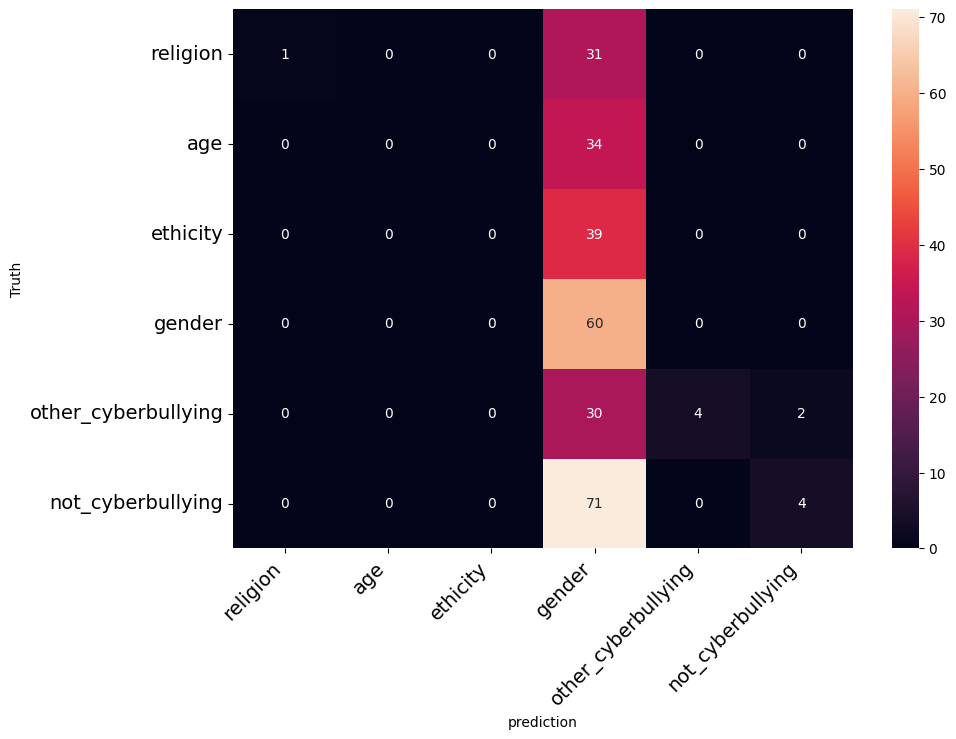

In [622]:
cm=confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,sentiments)

In [623]:
print('classification report:\n',classification_report(y_test, y_pred,target_names=sentiments))

classification report:
                      precision    recall  f1-score   support

           religion       1.00      0.03      0.06        32
                age       0.00      0.00      0.00        34
           ethicity       0.00      0.00      0.00        39
             gender       0.23      1.00      0.37        60
other_cyberbullying       1.00      0.11      0.20        36
  not_cyberbullying       0.67      0.05      0.10        75

           accuracy                           0.25       276
          macro avg       0.48      0.20      0.12       276
       weighted avg       0.48      0.25      0.14       276

